## 사전 데이터 설정

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# 데이터 불러오기
cifar10 = keras.datasets.cifar10

In [3]:
# train과 test로 분리하기
(train_input, train_target), (test_input, test_target) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
# 데이터 크기 확인하기
print("훈련 데이터 크기  : ", train_input.shape, train_target.shape)
print("테스트 데이터 크기: ", test_input.shape, test_target.shape)

훈련 데이터 크기  :  (50000, 32, 32, 3) (50000, 1)
테스트 데이터 크기:  (10000, 32, 32, 3) (10000, 1)


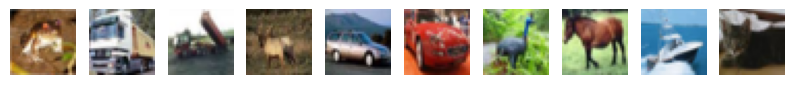

In [5]:
# 데이터 샘플 10개 확인해보기
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
# 10개의 훈련 데이터의 타깃값 확인하기
print([train_target[i][0] for i in range(10)])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [7]:
# 각 항목 별 개수 확인하기
import numpy as np

print("각 항목 별 개수 : ", np.unique(train_target, return_counts=True))

각 항목 별 개수 :  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [8]:
# 검증 데이터 설정
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2)

In [9]:
# 데이터 크기 확인하기
print("훈련 데이터 크기: ", train_input.shape, train_target.shape)
print("테스트 데이터 크기: ", test_input.shape, test_target.shape)
print("검증 데이터 크기: ", val_input.shape, val_target.shape)

훈련 데이터 크기:  (40000, 32, 32, 3) (40000, 1)
테스트 데이터 크기:  (10000, 32, 32, 3) (10000, 1)
검증 데이터 크기:  (10000, 32, 32, 3) (10000, 1)


## 데이터 정규화

In [10]:
# 픽셀값 0~1로 설정
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0
val_scaled = val_input / 255.0

In [11]:
print("훈련 0번: ", np.min(train_scaled[0]), np.max(train_scaled[0]))
print("훈련 1번: ", np.min(train_scaled[1]), np.max(train_scaled[1]))

훈련 0번:  0.023529411764705882 1.0
훈련 1번:  0.0 0.996078431372549


## 모델 정의

In [12]:
# 객체 생성
model = keras.Sequential()

In [13]:
# 합성곱 층 추가
# (32,32,3) --필터32개--> (32,32,32)
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                            padding='same', input_shape=(32,32,3)))

# (2,2) 최대풀링
# (32,32,32) --(2,2)풀링--> (16,16,32)
model.add(keras.layers.MaxPooling2D(2))

In [14]:
# 두번째 합성곱 층 추가
# (16,16,32) --필터64개--> (16,16,64)
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                            padding='same'))

# (2,2) 최대풀링
# (16,16,64) --(2,2)풀링--> (8,8,64)
model.add(keras.layers.MaxPooling2D(2))

In [15]:
# 세번째 합성곱 층 추가
# (8,8,64) --필터128개--> (8,8,128)
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',
                            padding='same'))

# (2,2) 최대풀링
# (8,8,128) --(2,2)풀링--> (4,4,128)
model.add(keras.layers.MaxPooling2D(2))

In [16]:
# Flatten 층 추가
model.add(keras.layers.Flatten())

# 밀집층 추가
model.add(keras.layers.Dense(128, activation='relu'))

# 드롭아웃 추가
# 드롭아웃 통해 과대적합 막아 성능 개선
model.add(keras.layers.Dropout(0.4))

# 두번째 밀집층 추가
# 클래스 개수(10개)와 동일한 출력층
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
#모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

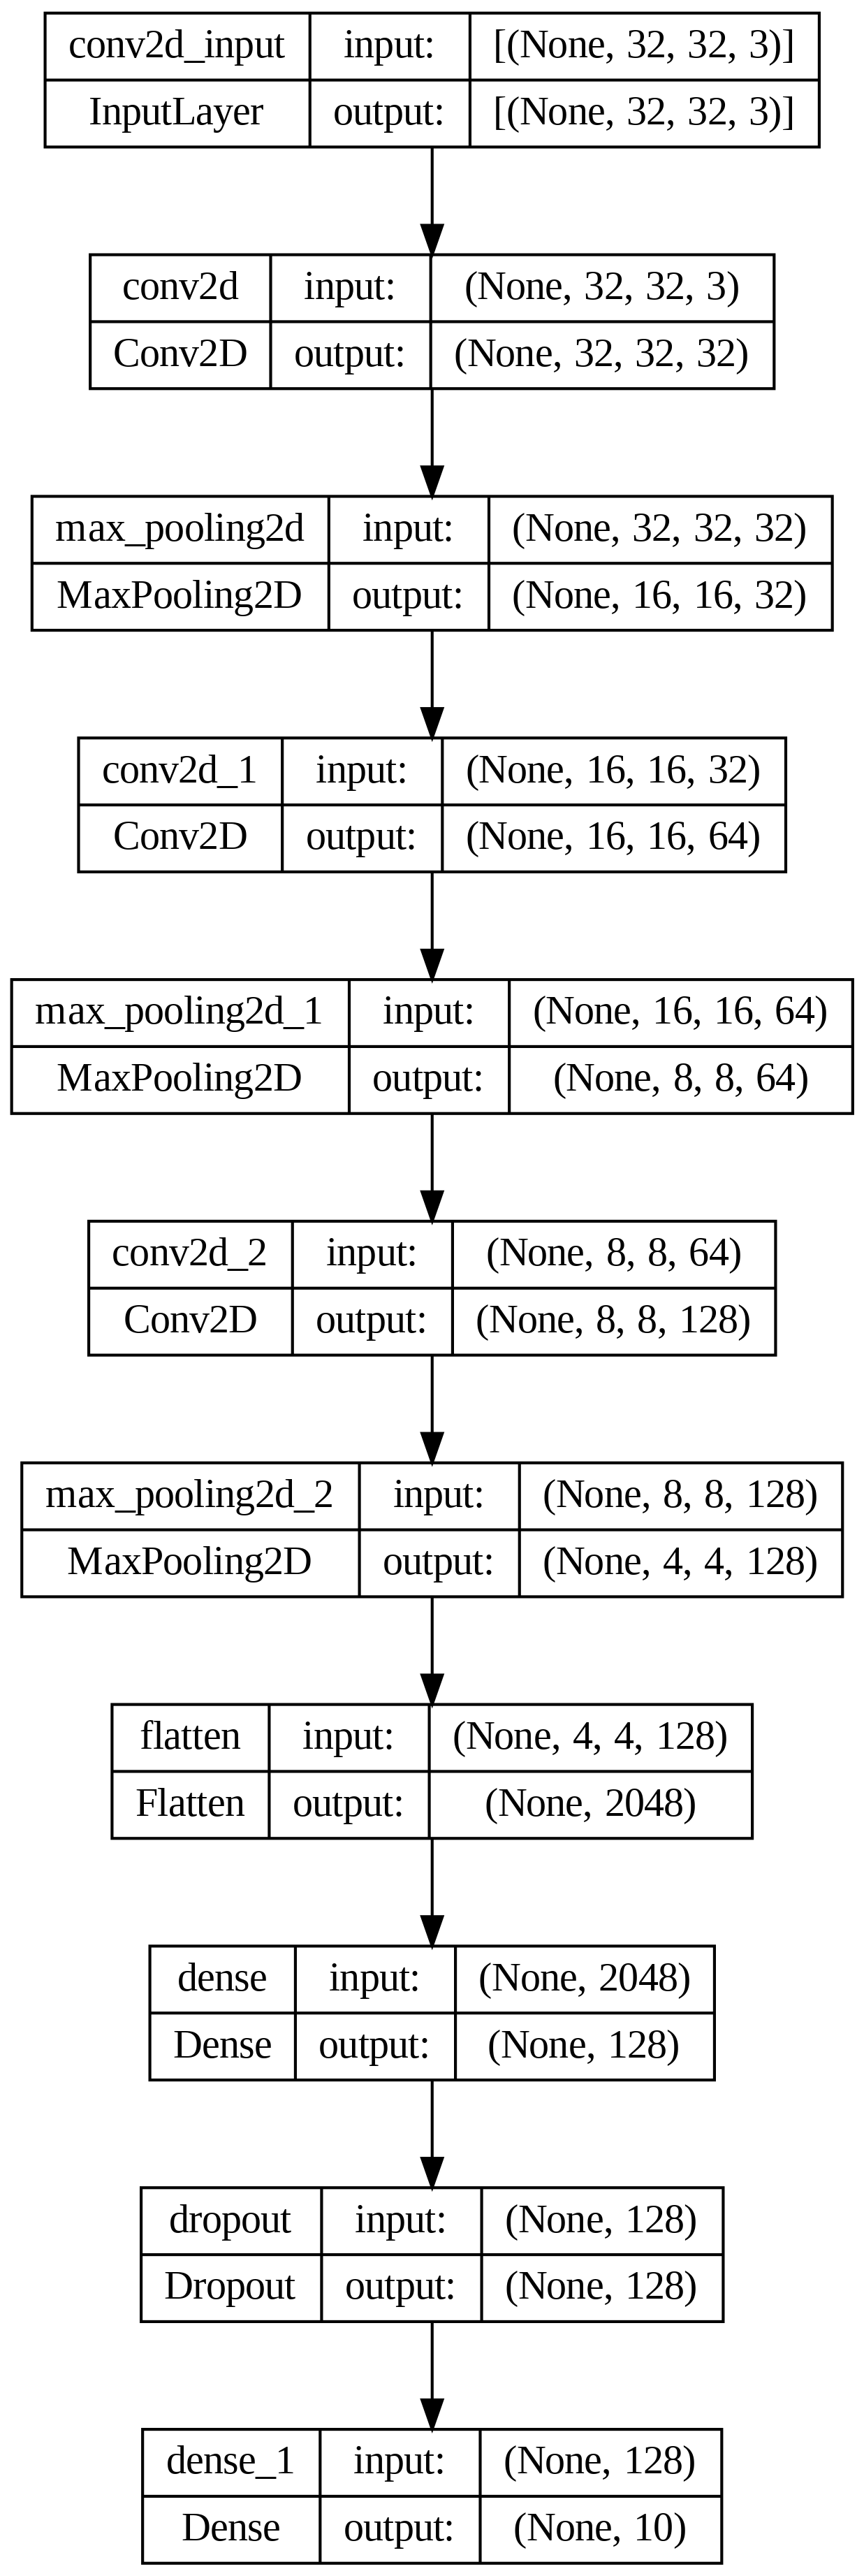

In [18]:
# 구조 시각화
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-model.png', dpi=300)

## 모델 컴파일

In [19]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics='accuracy')

In [20]:
# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                restore_best_weights=True)

# 훈련 & 히스토리에 객체에 전달
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1250/1250 [==============================] - 17s 6ms/step - loss: 1.6135 - accuracy: 0.4069 - val_loss: 1.2153 - val_accuracy: 0.5602
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2101 - accuracy: 0.5686 - val_loss: 1.0057 - val_accuracy: 0.6473
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0349 - accuracy: 0.6354 - val_loss: 0.9691 - val_accuracy: 0.6612
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9153 - accuracy: 0.6802 - val_loss: 0.8773 - val_accuracy: 0.6961
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8239 - accuracy: 0.7125 - val_loss: 0.8517 - val_accuracy: 0.6968
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7612 - accuracy: 0.7345 - val_loss: 0.8191 - val_accuracy: 0.7136
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7012 - accuracy: 0.7525 - val_loss: 0.8066 - val_accuracy

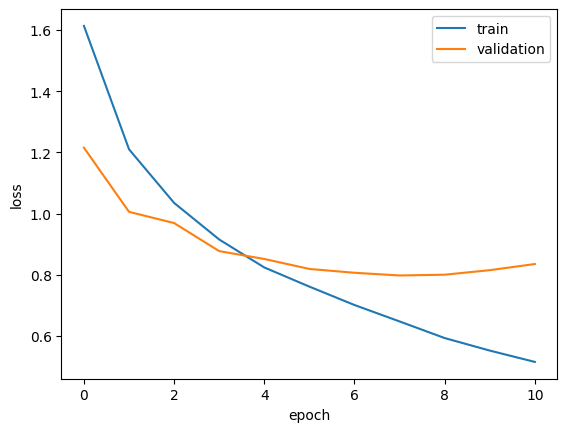

In [21]:
# 조기종료 확인 - 손실곡선
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

## 모델 성능 확인

In [22]:
# 최적의 모델 파라미터의 성능 검증 데이터로 확인
model.evaluate(val_scaled, val_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.7977 - accuracy: 0.7280


[0.7977216839790344, 0.7279999852180481]

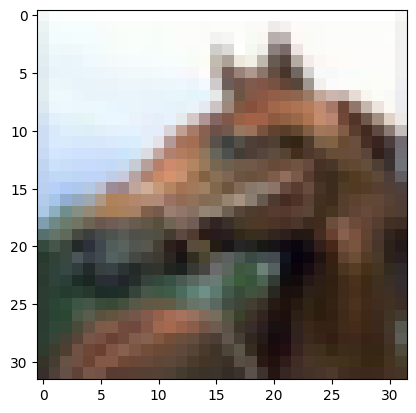

In [23]:
# 첫번째 이미지 확인
plt.imshow(val_scaled[0], cmap='gray_r')
plt.show()

In [24]:
# 모델 활용해서 첫번째 이미지 예측
preds = model.predict(val_scaled[0:1])

label = ['비행기', '자동차', '새', '고양이', '사슴',
        '개', '개구리', '말', '배', '트럭']
print("첫번째 이미지 예측 : ", label[np.argmax(preds)])

1/1 [==============================] - 0s 201ms/step
첫번째 이미지 예측 :  말


## 최종 성능 측정

In [25]:
# 테스트 데이터로 최종 성능 확인
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.7922 - accuracy: 0.7281


[0.7921702861785889, 0.7281000018119812]